In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Galaxy Shape Demo

In [2]:
from halotools.sim_manager import CachedHaloCatalog
halocat = CachedHaloCatalog(simname='bolshoi', halo_finder='rockstar', redshift=0, version_name='halotools_v0p4')

In [3]:
from halotools.empirical_models import HodModelFactory

# define the central occupatoion model
from halotools.empirical_models import TrivialPhaseSpace, Zheng07Cens
cens_occ_model =  Zheng07Cens()
cens_prof_model = TrivialPhaseSpace()

# define the satellite occupation model
from halotools.empirical_models import Zheng07Sats
from halotools.empirical_models import NFWPhaseSpace, SubhaloPhaseSpace
sats_occ_model =  Zheng07Sats()
sats_prof_model = SubhaloPhaseSpace('satellites', np.logspace(10.5, 15.2, 15))

from shape_model_componenets import EllipticalShapes
cens_shape_model = EllipticalShapes(gal_type = 'centrals')
sats_shape_model = EllipticalShapes(gal_type = 'satellites')

# combine model components
model_instance = HodModelFactory(centrals_occupation = cens_occ_model,
                                 centrals_profile = cens_prof_model,
                                 satellites_occupation = sats_occ_model,
                                 satellites_profile = sats_prof_model,
                                 centrals_galaxy_shape = cens_shape_model,
                                 satellites_galaxy_shape = sats_shape_model,
                                 model_feature_calling_sequence = (
                                 'centrals_occupation',
                                 'centrals_profile',
                                 'satellites_occupation',
                                 'satellites_profile',
                                 'centrals_galaxy_shape',
                                 'satellites_galaxy_shape')
                                )

In [4]:
# populate mock catalog
model_instance.populate_mock(halocat)
print("number of galaxies: ", len(model_instance.mock.galaxy_table))

number of galaxies:  74750


In [5]:
mock = model_instance.mock.galaxy_table

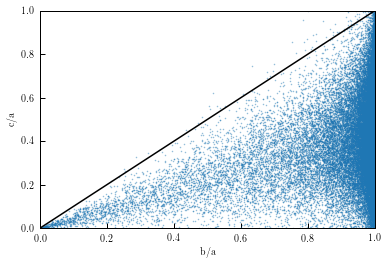

In [25]:
plt.figure()
plt.plot(mock['galaxy_b_to_a'], mock['galaxy_c_to_a'], '.', alpha=0.5, ms=1)
plt.plot([0,1],[0,1], '-', color='black')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('b/a')
plt.ylabel('c/a')
plt.show()

In [22]:
np.min(mock['galaxy_c_to_a'])

-1875.2506

In [23]:
bins = np.linspace(-1,1,100)
bin_centers = (bins[:-1] + bins[1:])/2.0
counts = np.histogram(mock['galaxy_c_to_a'], bins=bins)[0]

(0, 1)

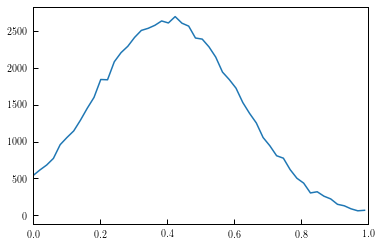

In [24]:
plt.plot(bin_centers, counts)
plt.xlim([0,1])

In [13]:
counts

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39